In [1]:
import pickle
with open('var1.pkl', 'rb') as f1:
    eva_model = pickle.load(f1)
with open('var2.pkl', 'rb') as f2:
    eva_model_pca = pickle.load(f2)
print(eva_model)
print(eva_model_pca)

[0.2638762771470863, 0.26437035184277835, 0.1948493552690919, 0.19504590768736438, 7.53603416597286, 7.55014442941728, 5.564696510051072, 5.570309844283009]
[0.447588443810088, 0.44948755815991, 0.33564572049632435, 0.3373669256659092, 12.782664062549633, 12.836900808573493, 9.585695404945223, 9.634851248376387]


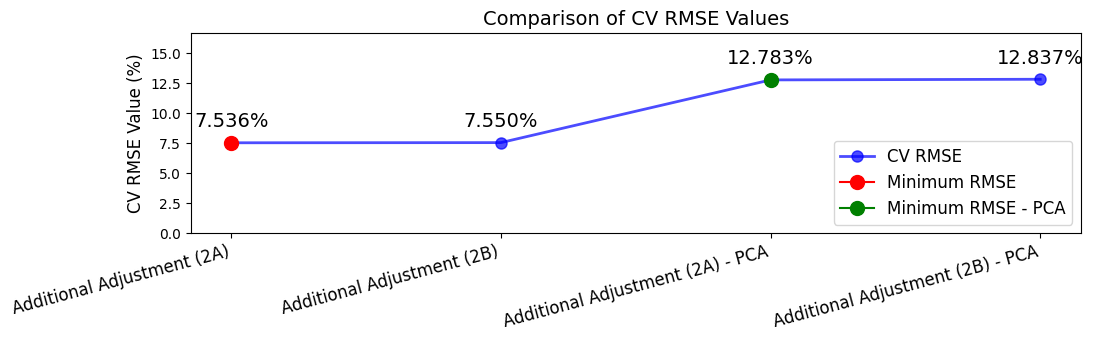

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# RMSE
CVrmse_values = [eva_model[4], eva_model[5], eva_model_pca[4], eva_model_pca[5]]

labels = [
    "Additional Adjustment (2A)",
    "Additional Adjustment (2B)",
    "Additional Adjustment (2A) - PCA",
    "Additional Adjustment (2B) - PCA",
]

# Minimum RMSE pour chaque partie
min_CVrmse_index_eva_model_6 = CVrmse_values[:2].index(min(CVrmse_values[:2]))  # Pour eva_model
min_CVrmse_index_eva_model_pca_6 = CVrmse_values[2:].index(min(CVrmse_values[2:])) + 2  # Pour eva_model_pca

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer la courbe RMSE en bleu
ax.plot(labels, CVrmse_values, marker='o', color='blue', alpha=0.7, linestyle='-', linewidth=2, markersize=8, label="CV RMSE")

# Marquer le point minimum pour eva_model en rouge
ax.plot(labels[min_CVrmse_index_eva_model_6], CVrmse_values[min_CVrmse_index_eva_model_6], 
        marker='o', color='red', markersize=10, label="Minimum RMSE")

# Marquer le point minimum pour eva_model_pca en vert
ax.plot(labels[min_CVrmse_index_eva_model_pca_6], CVrmse_values[min_CVrmse_index_eva_model_pca_6], 
        marker='o', color='green', markersize=10, label="Minimum RMSE - PCA")

# Annotation des valeurs
for i, z in enumerate(CVrmse_values):
    ax.text(i, CVrmse_values[i] + 1, f"{z:.3f}%", ha='center', fontsize=14, va='bottom')

# Définir manuellement les positions des ticks
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=12)
ax.set_ylim(0, max(CVrmse_values) * 1.3)

ax.set_title("Comparison of CV RMSE Values", fontsize=14)
ax.set_ylabel("CV RMSE Value (%)", fontsize=12)

# Ajouter la légende
ax.legend(loc='lower right', fontsize=12)

plt.subplots_adjust(left=0.01, right=0.9, bottom=0.5, top=0.9)
plt.savefig("Image/CV_RMSE_lineplot.png", dpi=300, bbox_inches='tight')
plt.show()

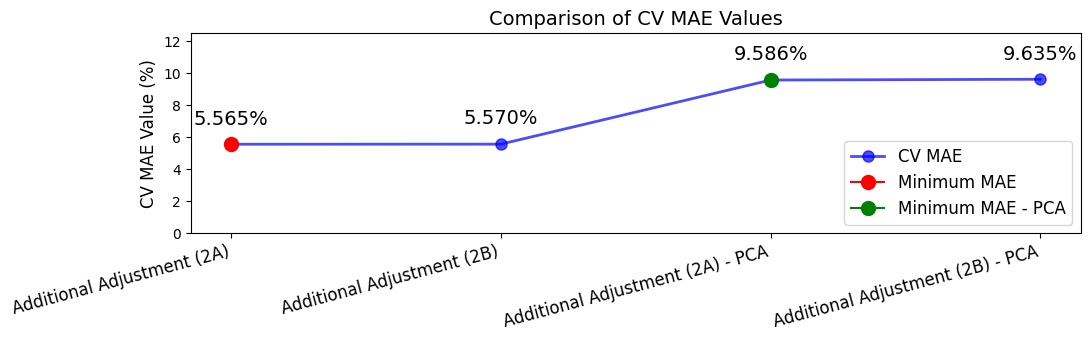

In [12]:
# CV MAE
CVmae_values = [eva_model[6], eva_model[7], eva_model_pca[6], eva_model_pca[7]]

labels = [
    "Additional Adjustment (2A)",
    "Additional Adjustment (2B)",
    "Additional Adjustment (2A) - PCA",
    "Additional Adjustment (2B) - PCA",
]

# Minimum MAE dans chaque groupe
min_CVmae_index_eva_model_8 = CVmae_values[:2].index(min(CVmae_values[:2])) 
min_CVmae_index_eva_model_pca_8 = CVmae_values[2:].index(min(CVmae_values[2:])) + 2  

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer la courbe MAE en bleu
ax.plot(labels, CVmae_values, marker='o', color='blue', alpha=0.7, linestyle='-', linewidth=2, markersize=8, label="CV MAE")

# Marquer le point minimum pour eva_model en rouge
ax.plot(labels[min_CVmae_index_eva_model_8], CVmae_values[min_CVmae_index_eva_model_8], 
        marker='o', color='red', markersize=10, label="Minimum MAE")

# Marquer le point minimum pour eva_model_pca en vert
ax.plot(labels[min_CVmae_index_eva_model_pca_8], CVmae_values[min_CVmae_index_eva_model_pca_8], 
        marker='o', color='green', markersize=10, label="Minimum MAE - PCA")

# Annotation des valeurs
for i, z in enumerate(CVmae_values):
    ax.text(i, CVmae_values[i] + 1, f"{z:.3f}%", ha='center', fontsize=14, va='bottom')

# Définir manuellement les positions des ticks
ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels, rotation=15, ha="right", fontsize=12)
ax.set_ylim(0, max(CVmae_values) * 1.3)

# Titre et labels
ax.set_title("Comparison of CV MAE Values", fontsize=14)
ax.set_ylabel("CV MAE Value (%)", fontsize=12)

# Ajouter la légende avec positionnement
ax.legend(loc='lower right', fontsize=12)

plt.subplots_adjust(left=0.01, right=0.9, bottom=0.5, top=0.9)
plt.savefig("Image/CV_MAE_lineplot.png", dpi=300, bbox_inches='tight')
plt.show()
